In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bodyPerformanceI.csv')
df

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0     24.0      F      152.4       42.5        23.4       57.0     112.0   
1     27.0      F      162.1       70.9        35.7       97.0     148.0   
2     23.0      M      173.7       68.3        13.6       76.0     137.0   
3     31.0      M      168.2       70.5        15.5       82.0     145.0   
4     25.0      M      175.1       64.8         6.9       65.0     118.0   
...    ...    ...        ...        ...         ...        ...       ...   
7010  21.0      M      179.6       78.6        16.3       64.0     118.0   
7011  56.0      M      166.8       64.0        21.4       75.0     132.0   
7012  26.0      M      177.4       78.3        14.0       74.0     115.0   
7013  49.0      M      177.2       83.0        19.7       98.0     158.0   
7014  43.0      F      161.5       49.9        29.8       79.0     155.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0          27.4                     14.2            50.0          184.0     C  
1          30.6                     11.0            42.0          157.0     D  
2          47.7                     16.5            48.0          208.0     C  
3          39.6                     19.9            66.0          264.0     C  
4          42.0                     19.8            49.0          252.0     B  
...         ...                      ...             ...            ...   ...  
7010       54.1                     25.9            58.0          248.0     B  
7011       50.7                     13.0            36.0          197.0     B  
7012       53.3                     15.3            63.0          234.0     A  
7013       40.2                     14.9            50.0          203.0     C  
7014       21.0                     16.5            23.0          146.0     C  

[7015 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      7015 non-null   float64
 1   gender                   7015 non-null   object 
 2   height_cm                7015 non-null   float64
 3   weight_kg                7015 non-null   float64
 4   body fat_%               7015 non-null   float64
 5   diastolic                7015 non-null   float64
 6   systolic                 7015 non-null   float64
 7   gripForce                7015 non-null   float64
 8   sit and bend forward_cm  7015 non-null   float64
 9   sit-ups counts           7015 non-null   float64
 10  broad jump_cm            7015 non-null   float64
 11  class                    7015 non-null   object 
dtypes: float64(10), object(2)
memory usage: 657.8+ KB


In [4]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [5]:
df['gender'].value_counts()

M    4552
F    2463
Name: gender, dtype: int64

In [6]:
df['class'].value_counts()

B    3222
C    2565
A     617
D     611
Name: class, dtype: int64

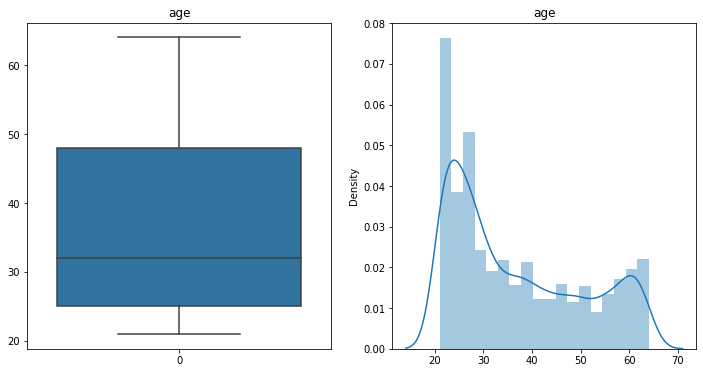

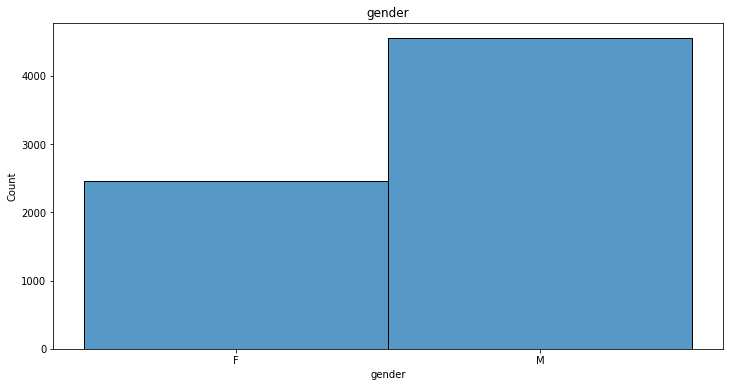

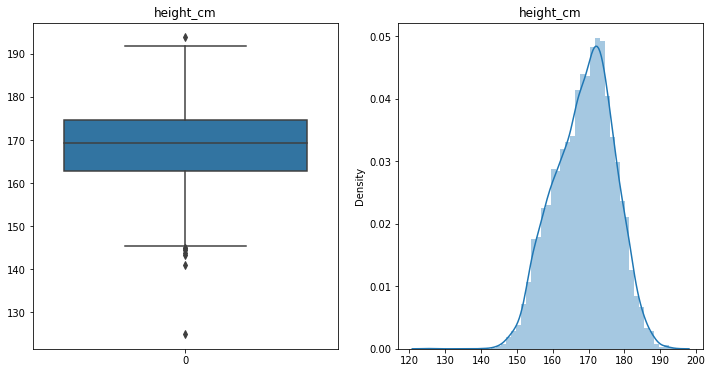

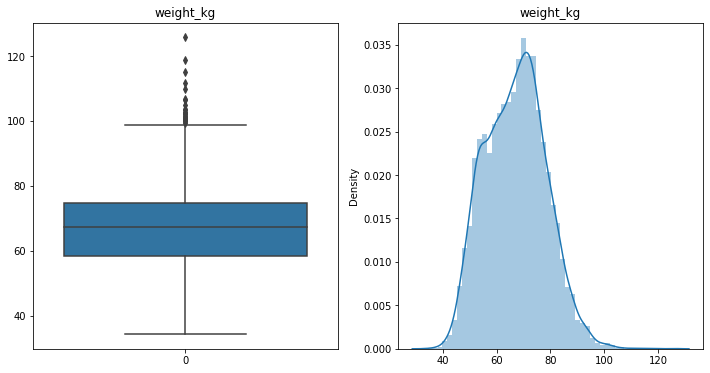

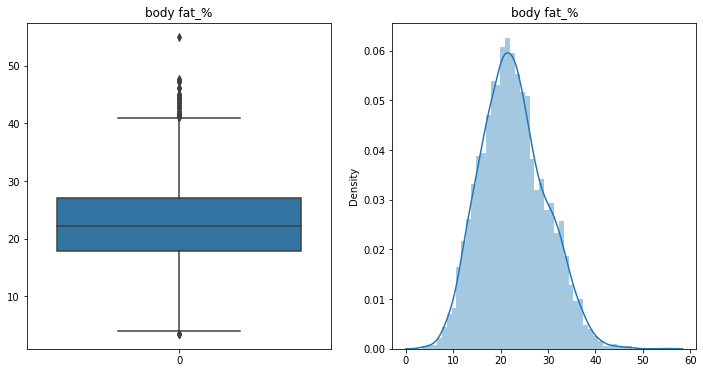

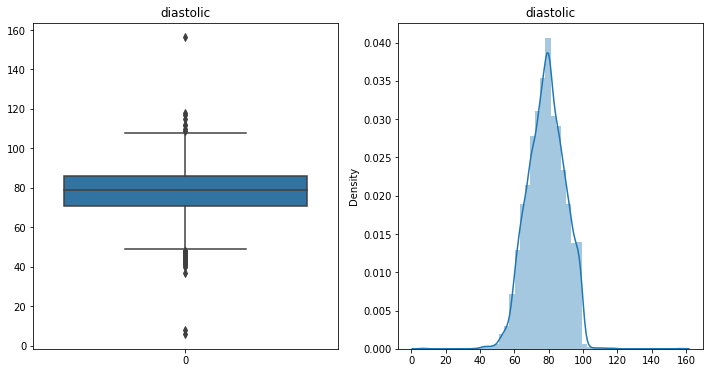

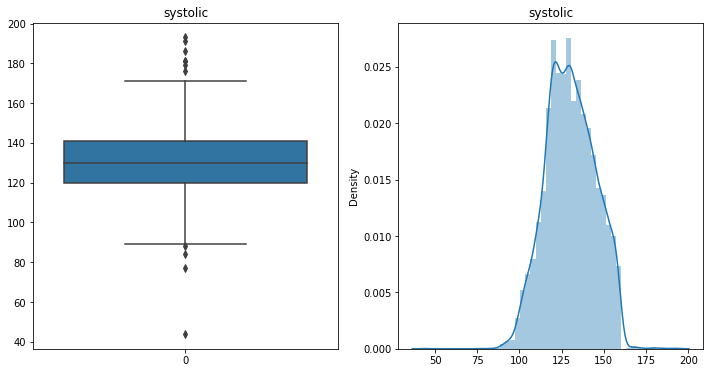

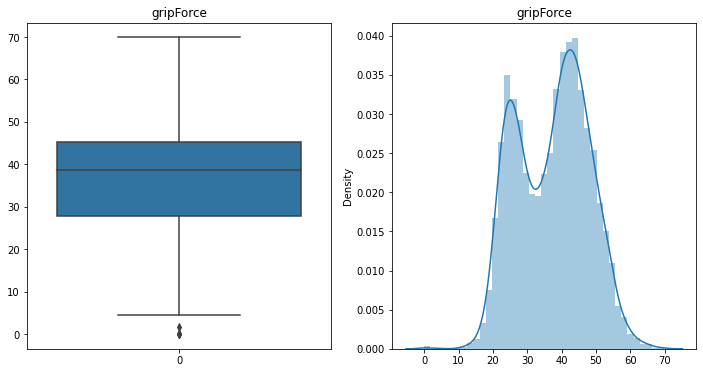

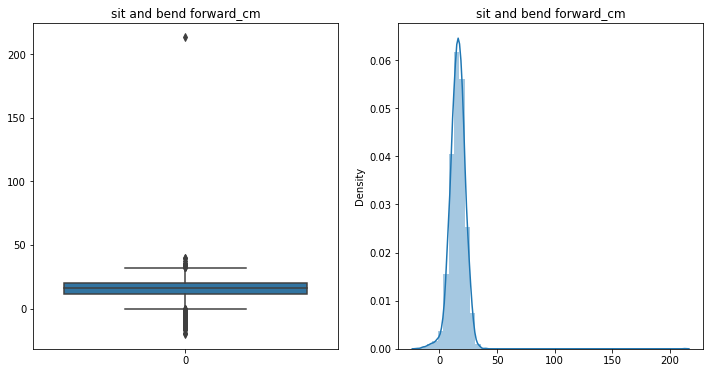

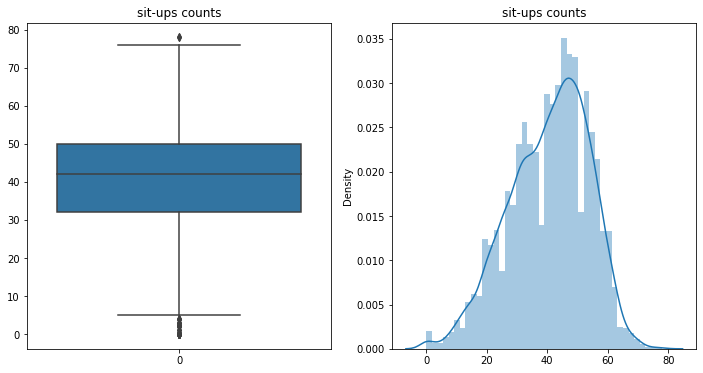

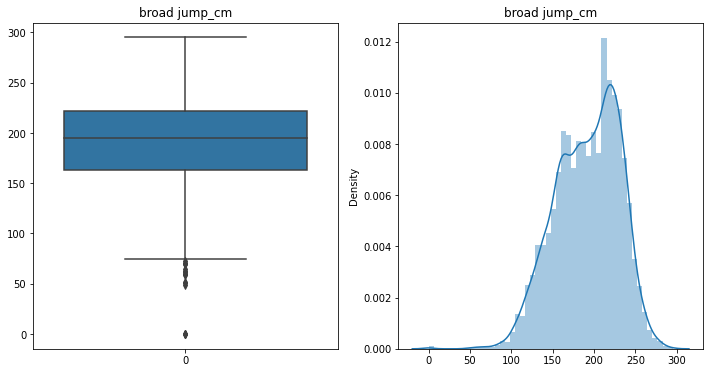

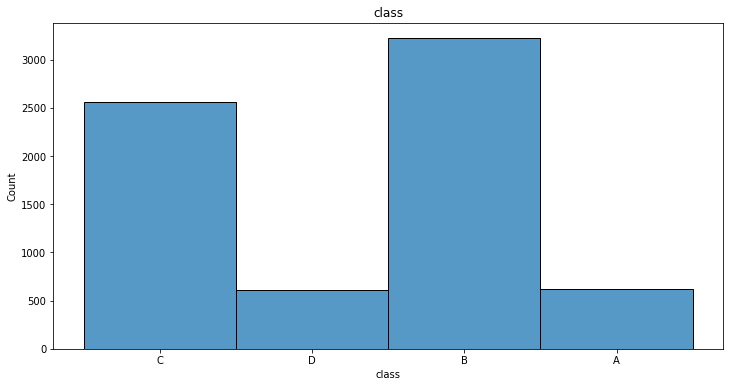

In [7]:
for column in df.columns:
    if df[column].dtype == 'object':
        fig, ax = plt.subplots(figsize=(12, 6))
        ax = sns.histplot(data=df[column])
        ax.set_title(column)
    elif df[column].dtype == 'float64':
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        sns.boxplot(data=df[column], ax=ax[0])
        ax[0].set_title(column)
        
        sns.distplot(x=df[column], ax=ax[1]);
        ax[1].set_title(column)

In [8]:
new_df = df.copy()
new_df['gender'] = df['gender'].replace({'M': 0, 'F': 1})
new_df['class'] =  df['class'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3})
new_df

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0     24.0       1      152.4       42.5        23.4       57.0     112.0   
1     27.0       1      162.1       70.9        35.7       97.0     148.0   
2     23.0       0      173.7       68.3        13.6       76.0     137.0   
3     31.0       0      168.2       70.5        15.5       82.0     145.0   
4     25.0       0      175.1       64.8         6.9       65.0     118.0   
...    ...     ...        ...        ...         ...        ...       ...   
7010  21.0       0      179.6       78.6        16.3       64.0     118.0   
7011  56.0       0      166.8       64.0        21.4       75.0     132.0   
7012  26.0       0      177.4       78.3        14.0       74.0     115.0   
7013  49.0       0      177.2       83.0        19.7       98.0     158.0   
7014  43.0       1      161.5       49.9        29.8       79.0     155.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  class  
0          27.4                     14.2            50.0          184.0      2  
1          30.6                     11.0            42.0          157.0      3  
2          47.7                     16.5            48.0          208.0      2  
3          39.6                     19.9            66.0          264.0      2  
4          42.0                     19.8            49.0          252.0      1  
...         ...                      ...             ...            ...    ...  
7010       54.1                     25.9            58.0          248.0      1  
7011       50.7                     13.0            36.0          197.0      1  
7012       53.3                     15.3            63.0          234.0      0  
7013       40.2                     14.9            50.0          203.0      2  
7014       21.0                     16.5            23.0          146.0      2  

[7015 rows x 12 columns]

<AxesSubplot:>

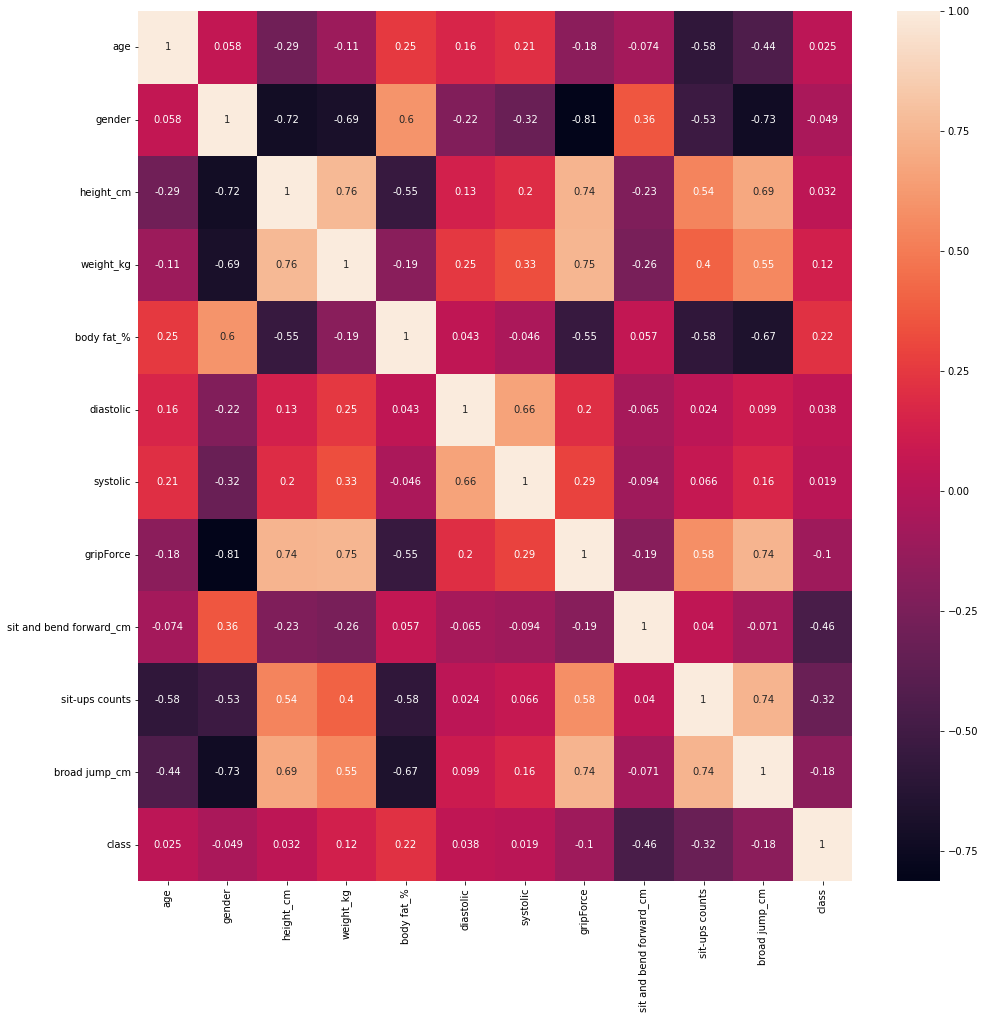

In [9]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(new_df.corr(), ax=ax, annot=True)

In [10]:
corr = new_df.corr()
unstacked = corr.unstack()
for e, u in enumerate(unstacked):
    if u == 1:
        unstacked[e] = 0

In [11]:
#Max absolute correlation
unstacked.abs().sort_values(ascending=False)

gender      gripForce     0.811698
gripForce   gender        0.811698
weight_kg   height_cm     0.761105
height_cm   weight_kg     0.761105
weight_kg   gripForce     0.752092
                            ...   
body fat_%  body fat_%    0.000000
weight_kg   weight_kg     0.000000
height_cm   height_cm     0.000000
gender      gender        0.000000
class       class         0.000000
Length: 144, dtype: float64

In [12]:
#Max positive correlation
unstacked.sort_values(ascending=False)

weight_kg       height_cm        0.761105
height_cm       weight_kg        0.761105
weight_kg       gripForce        0.752092
gripForce       weight_kg        0.752092
sit-ups counts  broad jump_cm    0.740434
                                   ...   
height_cm       gender          -0.723391
broad jump_cm   gender          -0.727814
gender          broad jump_cm   -0.727814
                gripForce       -0.811698
gripForce       gender          -0.811698
Length: 144, dtype: float64

In [13]:
#Max negative correlation
unstacked.sort_values(ascending=True)

gripForce      gender           -0.811698
gender         gripForce        -0.811698
               broad jump_cm    -0.727814
broad jump_cm  gender           -0.727814
height_cm      gender           -0.723391
                                   ...   
broad jump_cm  sit-ups counts    0.740434
weight_kg      gripForce         0.752092
gripForce      weight_kg         0.752092
weight_kg      height_cm         0.761105
height_cm      weight_kg         0.761105
Length: 144, dtype: float64

In [14]:
# Max absolute correlation for target feature class
corr.loc[corr.index == 'class'].abs().max().sort_values(ascending=False)[1:]

sit and bend forward_cm    0.459989
sit-ups counts             0.317935
body fat_%                 0.216034
broad jump_cm              0.180268
weight_kg                  0.122481
gripForce                  0.100442
gender                     0.049443
diastolic                  0.037550
height_cm                  0.031961
age                        0.024815
systolic                   0.019069
dtype: float64

In [15]:
# Max positive correlation for target feature class
corr.loc[corr.index == 'class'].max().sort_values(ascending=False)[1:]

body fat_%                 0.216034
weight_kg                  0.122481
diastolic                  0.037550
height_cm                  0.031961
age                        0.024815
systolic                   0.019069
gender                    -0.049443
gripForce                 -0.100442
broad jump_cm             -0.180268
sit-ups counts            -0.317935
sit and bend forward_cm   -0.459989
dtype: float64

In [16]:
# Max negative correlation for target feature class
corr.loc[corr.index == 'class'].min().sort_values(ascending=True)

sit and bend forward_cm   -0.459989
sit-ups counts            -0.317935
broad jump_cm             -0.180268
gripForce                 -0.100442
gender                    -0.049443
systolic                   0.019069
age                        0.024815
height_cm                  0.031961
diastolic                  0.037550
weight_kg                  0.122481
body fat_%                 0.216034
class                      1.000000
dtype: float64

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [18]:
def xgb_run(data):
    kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    for fold, (trn_ind, val_ind) in enumerate(kfold.split(data.drop('class', axis=1), data['class'])):
        x_train, y_train = data.loc[trn_ind].drop('class', axis=1), data.loc[trn_ind, 'class']
        x_val, y_val = data.loc[val_ind].drop('class', axis=1), data.loc[val_ind, 'class']

        model = XGBClassifier(silent=True, verbosity=0)
        model.fit(x_train, y_train)
        predictions = model.predict(x_val)

        print(f'fold: {fold + 1}, accuracy: {accuracy_score(predictions, y_val)}')

In [19]:
xgb_run(new_df)

fold: 1, accuracy: 0.729151817533856
fold: 2, accuracy: 0.7348538845331433
fold: 3, accuracy: 0.7263007840342124
fold: 4, accuracy: 0.7441197434069851
fold: 5, accuracy: 0.744832501781896


In [20]:
from imblearn.over_sampling import SMOTE

def xgb_oversample_run(data):
    kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    for fold, (trn_ind, val_ind) in enumerate(kfold.split(data.drop('class', axis=1), data['class'])):
        x_train, y_train = data.loc[trn_ind].drop('class', axis=1), data.loc[trn_ind, 'class']
        x_val, y_val = data.loc[val_ind].drop('class', axis=1), data.loc[val_ind, 'class']
        
        oversample = SMOTE()
        oversampled_x, oversampled_y = oversample.fit_resample(x_train, y_train)

        model = XGBClassifier(silent=True, verbosity=0)
        model.fit(oversampled_x, oversampled_y)
        predictions = model.predict(x_val)

        print(f'fold: {fold + 1}, accuracy: {accuracy_score(predictions, y_val)}')

In [21]:
xgb_oversample_run(new_df)

fold: 1, accuracy: 0.7077690662865289
fold: 2, accuracy: 0.7277263007840342
fold: 3, accuracy: 0.7263007840342124
fold: 4, accuracy: 0.7327156094084105
fold: 5, accuracy: 0.7419814682822523


In [24]:
# I used copypaste with little changes from here https://github.com/optuna/optuna-examples/blob/main/xgboost/xgboost_simple.py
import optuna
import xgboost as xgb
import numpy as np

def objective(trial, data):
    accuracy_vals = np.zeros(len(data))
    kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    for fold, (trn_ind, val_ind) in enumerate(kfold.split(data.drop('class', axis=1), data['class'])):
        train_x, train_y = data.loc[trn_ind].drop('class', axis=1), data.loc[trn_ind, 'class']
        valid_x, valid_y = data.loc[val_ind].drop('class', axis=1), data.loc[val_ind, 'class']
        dtrain = xgb.DMatrix(train_x, label=train_y)
        dvalid = xgb.DMatrix(valid_x, label=valid_y)

        param = {
            "verbosity": 0,
            "objective": "multi:softprob",
            #"eval_metric": "mlogloss",
            "num_class": len(data['class'].unique()),
            # use exact for small dataset.
            "tree_method": "exact",
            # defines booster, gblinear for linear functions.
            "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
            # L2 regularization weight.
            "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
            # L1 regularization weight.
            "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
            # sampling ratio for training data.
            "subsample": trial.suggest_float("subsample", 0.2, 1.0),
            # sampling according to each tree.
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        }

        if param["booster"] in ["gbtree", "dart"]:
            # maximum depth of the tree, signifies complexity of the tree.
            param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
            # minimum child weight, larger the term more conservative the tree.
            param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
            param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
            # defines how selective algorithm is.
            param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
            param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

        if param["booster"] == "dart":
            param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
            param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
            param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
            param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

        bst = xgb.train(param, dtrain)
        preds = bst.predict(dvalid)
        pred_labels = np.argmax(preds, axis=1)
        accuracy_temp = accuracy_score(valid_y, pred_labels)
        #print(f'fold: {fold + 1}, accuracy: {accuracy_temp}')
        accuracy_vals[valid_y.index] = pred_labels
    
    return accuracy_score(accuracy_vals, data['class'].values)

objective_with_df = lambda trials: objective(trials, new_df)
study = optuna.create_study(direction="maximize")
study.optimize(objective_with_df, n_trials=200)

[I 2022-01-12 05:27:50,730] A new study created in memory with name: no-name-9786cbbd-3431-4e5f-ae23-242109f18c40
[I 2022-01-12 05:27:51,143] Trial 0 finished with value: 0.5442622950819672 and parameters: {'booster': 'dart', 'lambda': 0.12654041776687824, 'alpha': 1.220759231165897e-08, 'subsample': 0.7331223349690721, 'colsample_bytree': 0.21578508882893424, 'max_depth': 5, 'min_child_weight': 2, 'eta': 1.6253332883051225e-07, 'gamma': 0.0012365427488409734, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.8696153980489325e-06, 'skip_drop': 8.814246361945978e-05}. Best is trial 0 with value: 0.5442622950819672.
[I 2022-01-12 05:27:51,389] Trial 1 finished with value: 0.6521739130434783 and parameters: {'booster': 'gbtree', 'lambda': 0.010124493041057135, 'alpha': 0.004806379966342365, 'subsample': 0.4961278111842461, 'colsample_bytree': 0.5042755692892411, 'max_depth': 3, 'min_child_weight': 9, 'eta': 0.40719181651189407, 'gamma': 5.21

[I 2022-01-12 05:27:58,970] Trial 17 finished with value: 0.6922309337134711 and parameters: {'booster': 'gbtree', 'lambda': 2.870994689146954e-07, 'alpha': 1.1477471036677683e-07, 'subsample': 0.6984863597158406, 'colsample_bytree': 0.8373095329240623, 'max_depth': 7, 'min_child_weight': 5, 'eta': 0.00033659239371780237, 'gamma': 1.3105501871365798e-08, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.7096222380612972.
[I 2022-01-12 05:27:59,799] Trial 18 finished with value: 0.7016393442622951 and parameters: {'booster': 'gbtree', 'lambda': 3.0152592607187025e-05, 'alpha': 0.00030415088420033214, 'subsample': 0.6516857080907853, 'colsample_bytree': 0.8023895814784773, 'max_depth': 9, 'min_child_weight': 6, 'eta': 9.550531850284248e-05, 'gamma': 5.630490267377335e-07, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.7096222380612972.
[I 2022-01-12 05:27:59,908] Trial 19 finished with value: 0.5103349964362082 and parameters: {'booster': 'gblinear', 'lambda': 1.82

[I 2022-01-12 05:28:12,571] Trial 37 finished with value: 0.6973627940128296 and parameters: {'booster': 'gbtree', 'lambda': 0.009581009648994061, 'alpha': 9.669310504183009e-07, 'subsample': 0.8250957674956654, 'colsample_bytree': 0.6229763310964381, 'max_depth': 7, 'min_child_weight': 7, 'eta': 0.16139779415043837, 'gamma': 6.866809823128378e-05, 'grow_policy': 'depthwise'}. Best is trial 25 with value: 0.7181753385602281.
[I 2022-01-12 05:28:13,523] Trial 38 finished with value: 0.7030648610121168 and parameters: {'booster': 'dart', 'lambda': 6.944741710561306e-06, 'alpha': 5.377336478856957e-08, 'subsample': 0.8832104214471582, 'colsample_bytree': 0.6720794332932952, 'max_depth': 9, 'min_child_weight': 5, 'eta': 0.0007334935844938753, 'gamma': 0.0034238257331279977, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.0463643184551978e-08, 'skip_drop': 0.17540991833463862}. Best is trial 25 with value: 0.7181753385602281.
[I 2022-01-12 0

[I 2022-01-12 05:28:26,490] Trial 55 finished with value: 0.6631503920171062 and parameters: {'booster': 'gbtree', 'lambda': 0.00790811623954031, 'alpha': 2.72909914290891e-08, 'subsample': 0.9654406850627049, 'colsample_bytree': 0.8637926337312344, 'max_depth': 5, 'min_child_weight': 6, 'eta': 0.007440729575157732, 'gamma': 2.822956667453504e-05, 'grow_policy': 'lossguide'}. Best is trial 25 with value: 0.7181753385602281.
[I 2022-01-12 05:28:27,335] Trial 56 finished with value: 0.7134711332858161 and parameters: {'booster': 'gbtree', 'lambda': 0.02624627428034773, 'alpha': 8.364447860442849e-08, 'subsample': 0.9519383182176305, 'colsample_bytree': 0.825616632820739, 'max_depth': 9, 'min_child_weight': 8, 'eta': 0.0854784313229733, 'gamma': 1.430188496245594e-06, 'grow_policy': 'lossguide'}. Best is trial 25 with value: 0.7181753385602281.
[I 2022-01-12 05:28:28,285] Trial 57 finished with value: 0.7158945117605132 and parameters: {'booster': 'dart', 'lambda': 0.0843037632515523, 'al

[I 2022-01-12 05:28:39,687] Trial 70 finished with value: 0.7184604419101924 and parameters: {'booster': 'dart', 'lambda': 0.6671194736077423, 'alpha': 0.0015215541945667584, 'subsample': 0.9796662729127409, 'colsample_bytree': 0.905532966111547, 'max_depth': 9, 'min_child_weight': 8, 'eta': 0.08820835267986202, 'gamma': 4.2989345767273165e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.01617810893977129, 'skip_drop': 4.82493827857932e-08}. Best is trial 70 with value: 0.7184604419101924.
[I 2022-01-12 05:28:40,668] Trial 71 finished with value: 0.7176051318602994 and parameters: {'booster': 'dart', 'lambda': 0.6381425761101922, 'alpha': 0.004568249137078512, 'subsample': 0.9784861600105098, 'colsample_bytree': 0.9121427511181676, 'max_depth': 9, 'min_child_weight': 8, 'eta': 0.09790464484644427, 'gamma': 1.1469228472532685e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.0177931696

[I 2022-01-12 05:28:53,834] Trial 85 finished with value: 0.7321454027084818 and parameters: {'booster': 'dart', 'lambda': 0.39402397619357743, 'alpha': 0.00010362502000232174, 'subsample': 0.9227079456469466, 'colsample_bytree': 0.9959807200925573, 'max_depth': 9, 'min_child_weight': 8, 'eta': 0.25559369105603613, 'gamma': 3.930742702450902e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.0085556236212501, 'skip_drop': 6.789986888949701e-07}. Best is trial 85 with value: 0.7321454027084818.
[I 2022-01-12 05:28:54,834] Trial 86 finished with value: 0.7348538845331433 and parameters: {'booster': 'dart', 'lambda': 0.3500651519838533, 'alpha': 9.066552393084775e-05, 'subsample': 0.922117386688356, 'colsample_bytree': 0.988695032968328, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.24999645541379498, 'gamma': 9.820020321594679e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.0041872389

[I 2022-01-12 05:29:06,811] Trial 100 finished with value: 0.6390591589451176 and parameters: {'booster': 'dart', 'lambda': 0.037724261513383955, 'alpha': 0.0006396027468449836, 'subsample': 0.21401797732320121, 'colsample_bytree': 0.9789397335809642, 'max_depth': 9, 'min_child_weight': 6, 'eta': 0.805865431736779, 'gamma': 3.677619266762039e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.0007545046731030748, 'skip_drop': 0.00023660306393141056}. Best is trial 86 with value: 0.7348538845331433.
[I 2022-01-12 05:29:07,743] Trial 101 finished with value: 0.7234497505345688 and parameters: {'booster': 'dart', 'lambda': 0.15444992202483812, 'alpha': 3.020977728036727e-05, 'subsample': 0.9155496719913117, 'colsample_bytree': 0.9768451479413788, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.5793092244747075, 'gamma': 1.591331232540972e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.00011

[I 2022-01-12 05:29:20,154] Trial 115 finished with value: 0.7186029935851747 and parameters: {'booster': 'dart', 'lambda': 0.31003650814120975, 'alpha': 1.6919501126324666e-05, 'subsample': 0.9117468946463722, 'colsample_bytree': 0.9807354868989107, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.061862571181667894, 'gamma': 5.264789597619836e-08, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0005929221015877832, 'skip_drop': 5.637800880511064e-06}. Best is trial 86 with value: 0.7348538845331433.
[I 2022-01-12 05:29:21,149] Trial 116 finished with value: 0.7255880256593015 and parameters: {'booster': 'dart', 'lambda': 0.14967288180356658, 'alpha': 1.0173797387154848e-05, 'subsample': 0.9499402452414318, 'colsample_bytree': 0.8806119054664792, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.22698027160973172, 'gamma': 8.046226187275995e-08, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.

[I 2022-01-12 05:29:33,200] Trial 130 finished with value: 0.6736992159657876 and parameters: {'booster': 'dart', 'lambda': 0.6725835195270582, 'alpha': 2.199804470894834e-06, 'subsample': 0.9574332962281636, 'colsample_bytree': 0.934033784455091, 'max_depth': 5, 'min_child_weight': 6, 'eta': 0.05076079857879029, 'gamma': 1.5223227064336463e-08, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.0031126309774714587, 'skip_drop': 0.5258512283973152}. Best is trial 86 with value: 0.7348538845331433.
[I 2022-01-12 05:29:34,197] Trial 131 finished with value: 0.7290092658588738 and parameters: {'booster': 'dart', 'lambda': 0.36841114450737067, 'alpha': 3.832723960623226e-06, 'subsample': 0.9585262180233285, 'colsample_bytree': 0.9189315927980594, 'max_depth': 9, 'min_child_weight': 8, 'eta': 0.187730448174725, 'gamma': 4.080045324130646e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.0066007106

[I 2022-01-12 05:29:47,823] Trial 145 finished with value: 0.7305773342836779 and parameters: {'booster': 'dart', 'lambda': 0.6975291128925846, 'alpha': 1.622973356340956e-06, 'subsample': 0.9639927206918844, 'colsample_bytree': 0.9211681524192485, 'max_depth': 9, 'min_child_weight': 8, 'eta': 0.3177599157535738, 'gamma': 2.5634903190797192e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.008826998988475686, 'skip_drop': 0.4174701525851304}. Best is trial 86 with value: 0.7348538845331433.
[I 2022-01-12 05:29:48,689] Trial 146 finished with value: 0.7104775481111903 and parameters: {'booster': 'dart', 'lambda': 0.19813010516065999, 'alpha': 8.582358243558801e-07, 'subsample': 0.41342071196341384, 'colsample_bytree': 0.9228040718382343, 'max_depth': 9, 'min_child_weight': 8, 'eta': 0.29458377951558823, 'gamma': 1.4248607256045458e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.032631

[I 2022-01-12 05:30:01,813] Trial 161 finished with value: 0.726728439059159 and parameters: {'booster': 'dart', 'lambda': 0.8497151997891433, 'alpha': 4.248204507300839e-07, 'subsample': 0.904793780255588, 'colsample_bytree': 0.946387130938323, 'max_depth': 9, 'min_child_weight': 10, 'eta': 0.38343072663009636, 'gamma': 2.4681109935716714e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.0005557849377594426, 'skip_drop': 0.9870295843251626}. Best is trial 86 with value: 0.7348538845331433.
[I 2022-01-12 05:30:02,786] Trial 162 finished with value: 0.729151817533856 and parameters: {'booster': 'dart', 'lambda': 0.259932253936127, 'alpha': 2.2263757526521754e-07, 'subsample': 0.9361830522019537, 'colsample_bytree': 0.9989351374755528, 'max_depth': 9, 'min_child_weight': 9, 'eta': 0.377179696790558, 'gamma': 1.066476829843863e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.00127970

[I 2022-01-12 05:30:16,215] Trial 176 finished with value: 0.7310049893086243 and parameters: {'booster': 'dart', 'lambda': 0.16145881460111491, 'alpha': 1.3484782448519168e-07, 'subsample': 0.9470975625414434, 'colsample_bytree': 0.942910136897098, 'max_depth': 9, 'min_child_weight': 9, 'eta': 0.23214881419709446, 'gamma': 2.0206705149096343e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.0008880827631633771, 'skip_drop': 0.40512572032690747}. Best is trial 86 with value: 0.7348538845331433.
[I 2022-01-12 05:30:16,326] Trial 177 finished with value: 0.5083392729864575 and parameters: {'booster': 'gblinear', 'lambda': 0.12655468360829786, 'alpha': 1.9068720643460736e-07, 'subsample': 0.9497609075825653, 'colsample_bytree': 0.9387280423365968}. Best is trial 86 with value: 0.7348538845331433.
[I 2022-01-12 05:30:17,250] Trial 178 finished with value: 0.7290092658588738 and parameters: {'booster': 'dart', 'lambda': 0.17391153627291947,

[I 2022-01-12 05:30:29,945] Trial 191 finished with value: 0.7282965074839629 and parameters: {'booster': 'dart', 'lambda': 0.2792584092544006, 'alpha': 4.808301175116668e-07, 'subsample': 0.9470767162697279, 'colsample_bytree': 0.8821736629767868, 'max_depth': 9, 'min_child_weight': 9, 'eta': 0.18013720326032517, 'gamma': 2.480321452808788e-05, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.000700542589345681, 'skip_drop': 0.7634959227556584}. Best is trial 86 with value: 0.7348538845331433.
[I 2022-01-12 05:30:30,878] Trial 192 finished with value: 0.723592302209551 and parameters: {'booster': 'dart', 'lambda': 0.145489111611757, 'alpha': 7.51360701898986e-07, 'subsample': 0.9993768650239316, 'colsample_bytree': 0.8949288505795345, 'max_depth': 9, 'min_child_weight': 9, 'eta': 0.20237393195545894, 'gamma': 5.6432360368182265e-06, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.00028672598